In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


# **Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

# **Loading data and Preporcessing**

In [ ]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
#dropped RowNumber, CustomerId, Surname columns
df.drop(columns =['RowNumber','CustomerId','Surname'], inplace = True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
#label encoding Geographym Gender columns
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first = True)
df = df.astype(int)

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [ ]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1 )

In [ ]:
#Scaling the values
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model building**

In [ ]:
model = Sequential()

model.add(Input(shape=(11, )))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(11, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled, y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7167 - loss: 0.5963 - val_accuracy: 0.7975 - val_loss: 0.4841
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7960 - loss: 0.4611 - val_accuracy: 0.8006 - val_loss: 0.4498
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7985 - loss: 0.4330 - val_accuracy: 0.8037 - val_loss: 0.4351
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8053 - loss: 0.4190 - val_accuracy: 0.8119 - val_loss: 0.4207
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8281 - loss: 0.4152 - val_accuracy: 0.8300 - val_loss: 0.4052
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.4143 - val_accuracy: 0.8388 - val_loss: 0.3893
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8485 - loss: 0.3833 - val_accuracy: 0.8438 - val_loss: 0.3742
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8520 - loss: 0.3811 - val_accu

# **Prediction**

In [ ]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred

array([[0.01005471],
       [0.06513331],
       [0.03483623],
       ...,
       [0.00382926],
       [0.04076531],
       [0.44416395]], dtype=float32)

In [ ]:
y_pred = y_pred.argmax(axis=-1)
print(y_pred)

[0 0 0 ... 0 0 0]


# **Evaluation**

In [ ]:
accuracy_score(y_test, y_pred)

0.7925

In [ ]:
history.history['loss']

[0.5444000959396362,
 0.4529857933521271,
 0.4308222532272339,
 0.41928383708000183,
 0.40678784251213074,
 0.3930318057537079,
 0.379240483045578,
 0.3679082989692688,
 0.3600080609321594,
 0.3540022373199463,
 0.3498675227165222,
 0.3458845913410187,
 0.34443435072898865,
 0.34234729409217834,
 0.3408893346786499,
 0.3394348621368408,
 0.33813774585723877,
 0.3370755910873413,
 0.3355009853839874,
 0.33504045009613037,
 0.3341662883758545,
 0.33337220549583435,
 0.33284497261047363,
 0.33267202973365784,
 0.3317573666572571,
 0.33132249116897583,
 0.33079859614372253,
 0.33021050691604614,
 0.32968729734420776,
 0.32928192615509033,
 0.32892075181007385,
 0.32805097103118896,
 0.32805904746055603,
 0.3277893364429474,
 0.3274058997631073,
 0.3268495202064514,
 0.32690370082855225,
 0.32599854469299316,
 0.32580435276031494,
 0.32590848207473755,
 0.3252300024032593,
 0.3250069320201874,
 0.32464534044265747,
 0.32443156838417053,
 0.3248785734176636,
 0.32368412613868713,
 0.32387095

In [ ]:
history.history['val_loss']

[0.48413240909576416,
 0.44982007145881653,
 0.4351145625114441,
 0.4207192659378052,
 0.4051693081855774,
 0.3893383741378784,
 0.37420886754989624,
 0.3650718033313751,
 0.35875484347343445,
 0.35587313771247864,
 0.3548468053340912,
 0.3539581596851349,
 0.35131293535232544,
 0.3506011962890625,
 0.3512215316295624,
 0.3519163429737091,
 0.3506646454334259,
 0.34907835721969604,
 0.3486356735229492,
 0.3486694097518921,
 0.34821268916130066,
 0.34857678413391113,
 0.34787943959236145,
 0.3471791744232178,
 0.3469027578830719,
 0.34601306915283203,
 0.34647777676582336,
 0.34665313363075256,
 0.34654179215431213,
 0.34531867504119873,
 0.34546688199043274,
 0.3456374406814575,
 0.3455265462398529,
 0.3449557423591614,
 0.34557488560676575,
 0.3451601266860962,
 0.3449598252773285,
 0.3458033502101898,
 0.34468457102775574,
 0.34454941749572754,
 0.3463267982006073,
 0.3443830609321594,
 0.3447187840938568,
 0.3460109829902649,
 0.3441406488418579,
 0.3445720970630646,
 0.344670176506

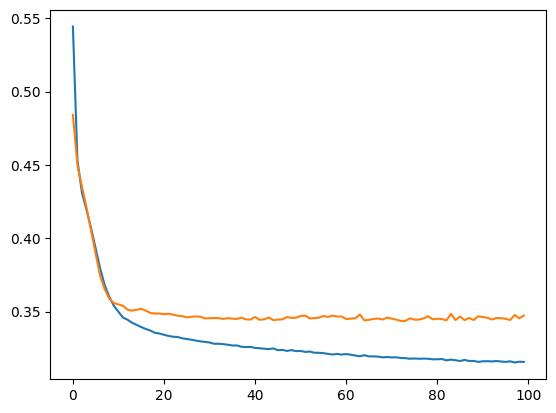

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

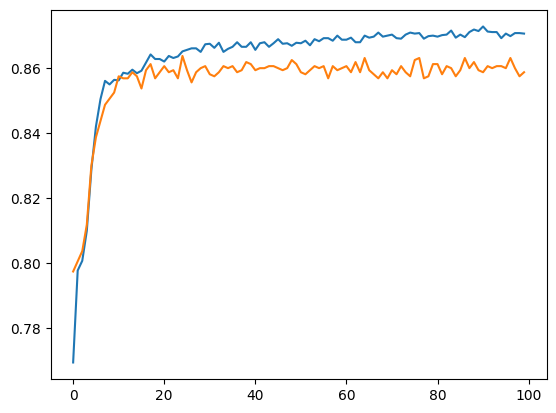

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()